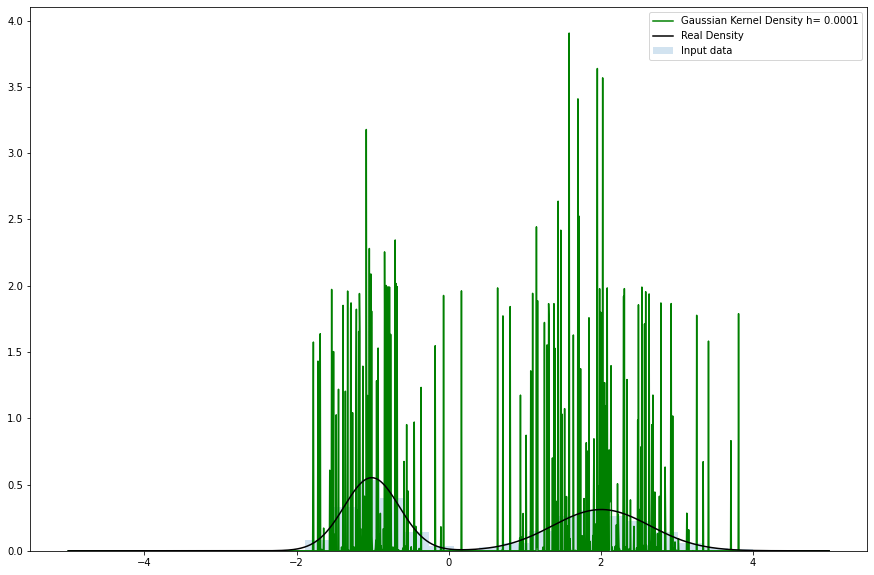

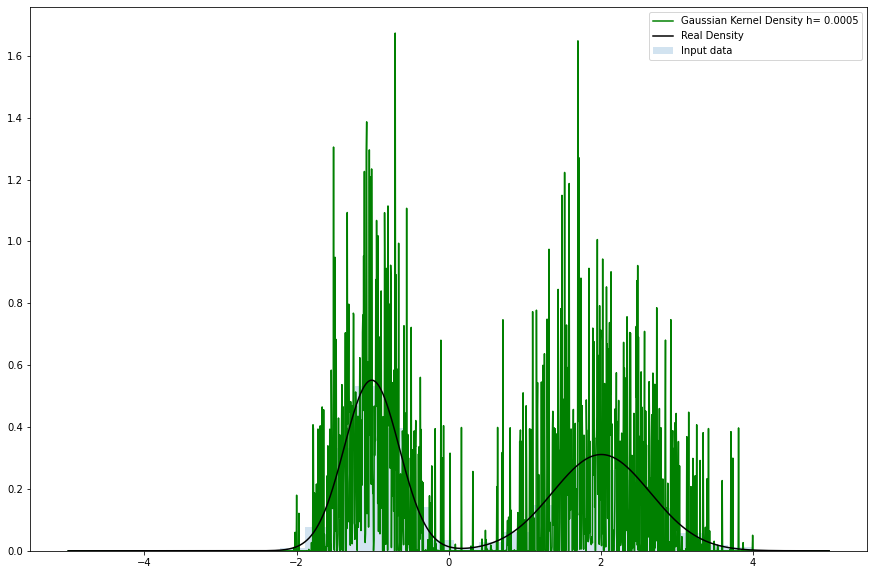

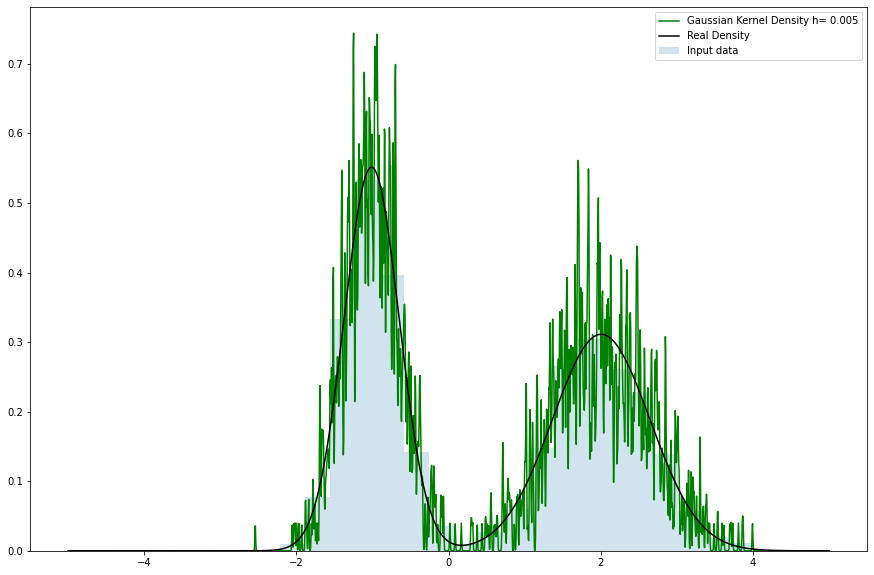

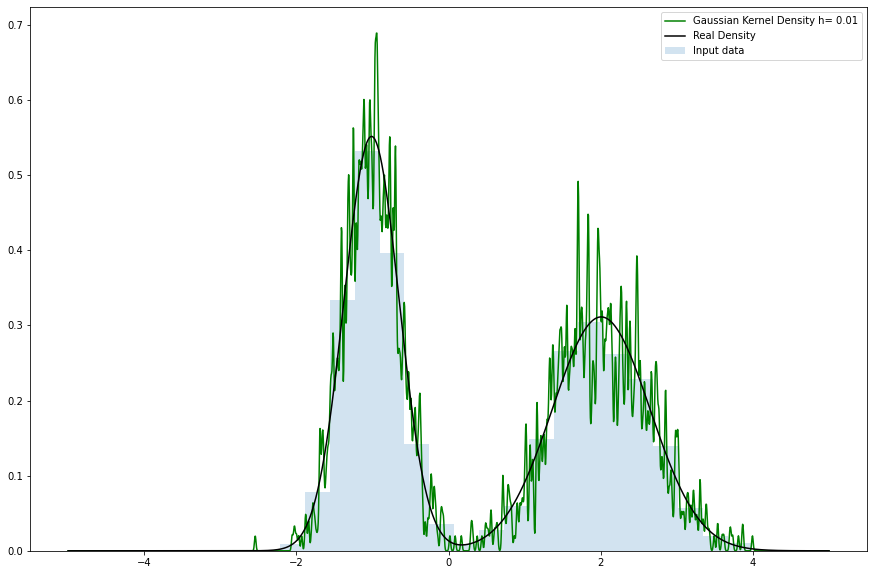

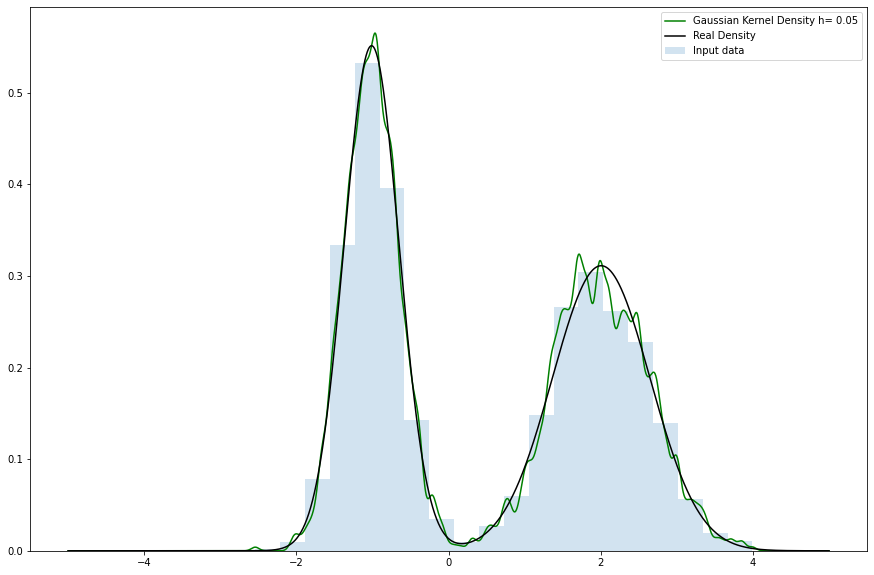

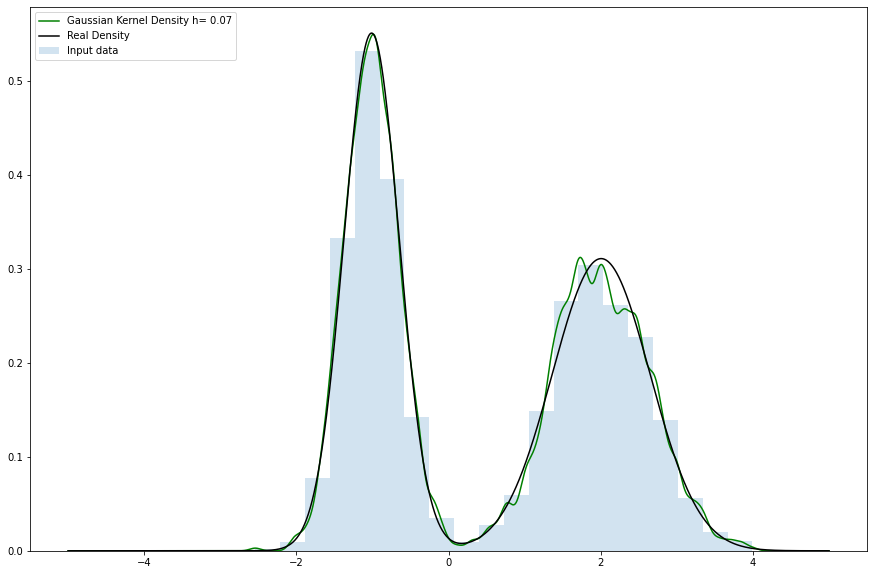

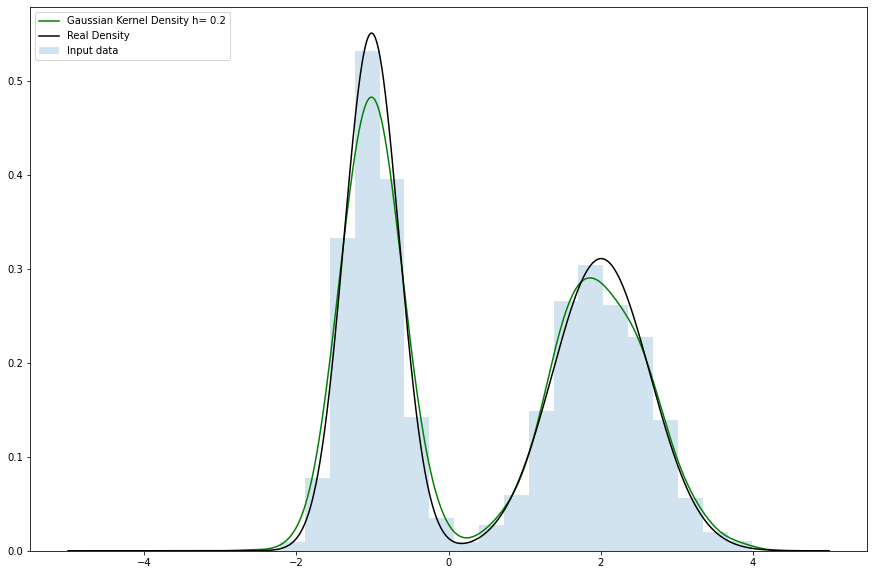

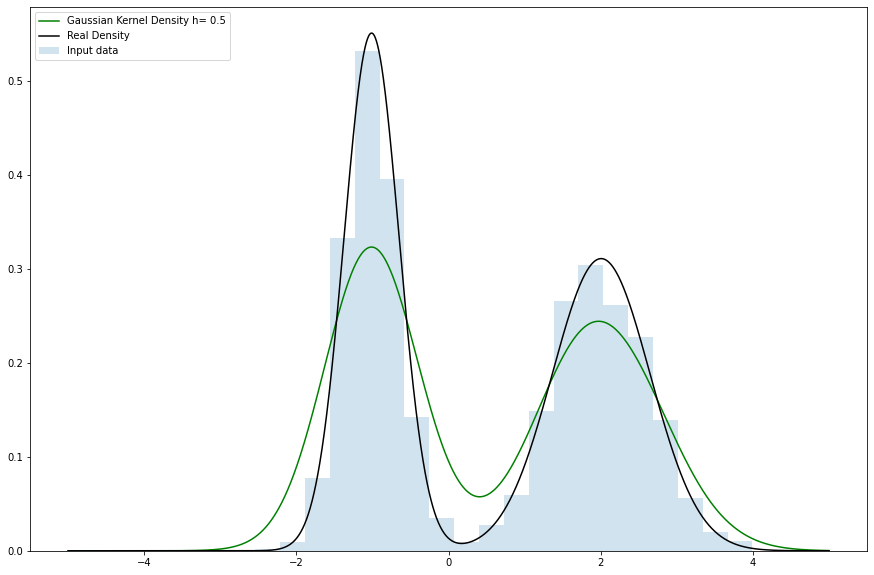

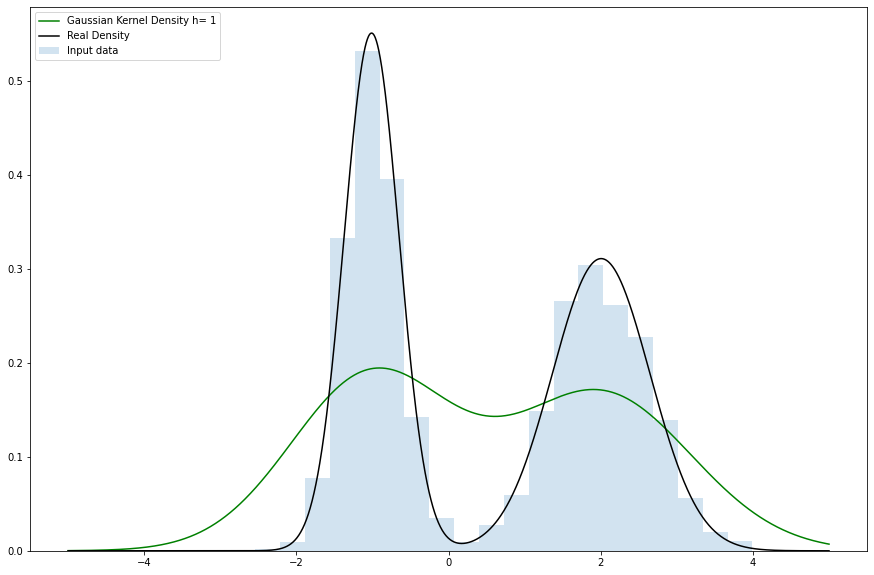

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity
import pandas as pd
import datetime
#Estimating p(x) of a mixture gaussian ussing  Kernel Estimators and Histogram


mus =  np.array([[-1], [2]])
sigmas = np.array([[0.6], [0.8]])**2
gmm = GaussianMixture(2)
gmm.means_ = mus
gmm.covars_ = sigmas
gmm.weights_ = np.array([0.5, 0.5])


gaus_samples_1 = np.random.normal(mus[0], sigmas[0], 1000).reshape(1000,1)
gaus_samples_2 = np.random.normal(mus[1], sigmas[1], 1000).reshape(1000,1)
fit_samples = np.concatenate((gaus_samples_1, gaus_samples_2))
gmm.fit(fit_samples)


x = np.linspace(-5, 5, 2000).reshape(2000,1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)

for h in [0.0001,0.0005,0.005,0.01,0.05,0.07,0.2,0.5,1]:
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(fit_samples)
    log_dens = kde.score_samples(x)




    ax.hist(fit_samples,20, density=True, histtype='stepfilled', alpha=0.2,label="Input data")
    ax.plot(x, np.exp(log_dens), '-g',label="Gaussian Kernel Density h= "+str(h))
    ax.plot(x, pdf, '-k',label="Real Density")

    plt.legend()
    plt.show()



In [55]:
df = pd.read_csv('old_faithful.csv', sep='\t', header=0)

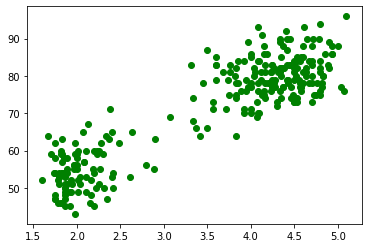

In [60]:
eruptions = []
waiting =[]
biv = []
for i in range(0,len(df)):
    eruptions.append(df["eruptions"][i])
    waiting.append(df["waiting"][i])
plt.plot(eruptions,waiting,'go')

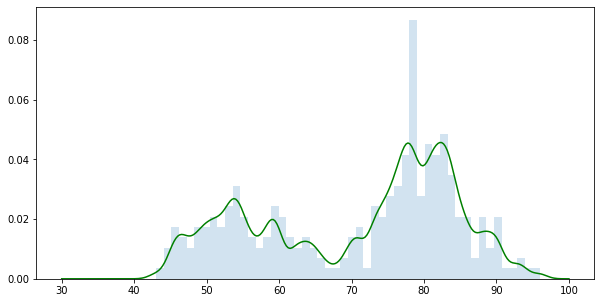

In [85]:
x = np.linspace(30, 100, 272).reshape(272,1)
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(np.array([waiting]).reshape(272,1))
log_dens = kde.score_samples(x)
plt.figure(figsize=(10,5))
plt.plot(x, np.exp(log_dens), '-g',label="Gaussian Kernel Density h= "+str(h))
plt.hist(waiting,50, density=True, histtype='stepfilled', alpha=0.2,label="Input data")
plt.show()


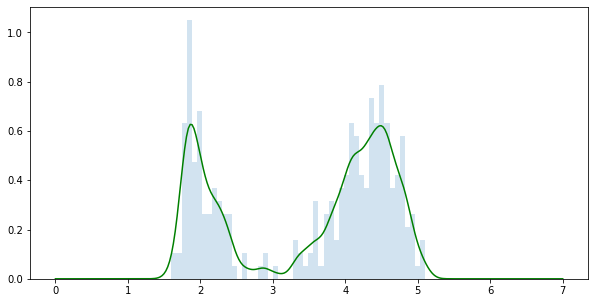

In [89]:
x = np.linspace(0, 7, 272).reshape(272,1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array([eruptions]).reshape(272,1))
log_dens = kde.score_samples(x)
plt.figure(figsize=(10,5))
plt.plot(x, np.exp(log_dens), '-g',label="Gaussian Kernel Density h= "+str(h))
plt.hist(eruptions,50, density=True, histtype='stepfilled', alpha=0.2,label="Input data")
plt.show()